Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster as KCluster

Data Collection & Analysis

loads two CSV files (purchase_history.csv and events_history.csv) into Pandas DataFrames named purchase_data and event_data.

In [2]:
purchase_data = pd.read_csv('./purchase_history.csv')
event_data = pd.read_csv('./events_history.csv')

In [3]:
purchase_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [4]:
purchase_data.shape

(2633521, 8)

In [5]:
purchase_data = purchase_data.drop(columns=['order_id'])  # Remove order_id
purchase_data['event_type'] = 'purchase'

Removes the order_id column from purchase_data and adds a new column event_type with the value 'purchase' to the DataFrame.

In [6]:
purchase_data.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,event_type
0,2020-04-24 11:50:39 UTC,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,purchase
1,2020-04-24 11:50:39 UTC,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,purchase
2,2020-04-24 14:37:43 UTC,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,purchase
3,2020-04-24 14:37:43 UTC,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,purchase
4,2020-04-24 19:16:21 UTC,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,purchase


In [7]:
event_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [8]:
event_data = event_data.drop(columns=['user_session'])

drops the 'user_session' column from the event_data DataFrame

In [9]:
event_data = event_data[['event_time', 'product_id','category_id','category_code','brand','price','user_id',  'event_type']]

Reorders the columns in the event_data DataFrame, keeping only the specified columns: 'event_time', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', and 'event_type'.

In [10]:
event_data.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,event_type
0,2020-09-24 11:57:06 UTC,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,view
1,2020-09-24 11:57:26 UTC,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,view
2,2020-09-24 11:57:27 UTC,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,view
3,2020-09-24 11:57:33 UTC,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,view
4,2020-09-24 11:57:36 UTC,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,view


concatenates the purchase_data and event_data DataFrames vertically (stacking them), creating a new DataFrame called combined_data

In [11]:
combined_data = pd.concat([purchase_data, event_data], ignore_index=True)

In [12]:
combined_data.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,event_type
0,2020-04-24 11:50:39 UTC,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,purchase
1,2020-04-24 11:50:39 UTC,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,purchase
2,2020-04-24 14:37:43 UTC,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,purchase
3,2020-04-24 14:37:43 UTC,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,purchase
4,2020-04-24 19:16:21 UTC,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,purchase


In [13]:
shuffled_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_data.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,event_type
0,2020-02-20 09:07:21 UTC,2273948297037087396,2.268106e+18,NaN,goodride,48.82,NaN,purchase
1,2020-08-03 06:21:20 UTC,1515966223510137406,2.268105e+18,computers.components.power_supply,x-game,11.32,1.515916e+18,purchase
2,2020-11-20 07:43:18 UTC,861500,2.144416e+18,NaN,NaN,69.29,1.515916e+18,view
3,2021-01-26 11:32:13 UTC,1466900,2.144416e+18,NaN,palmexx,34.44,1.515916e+18,view
4,2020-03-05 04:29:00 UTC,1515966223509089500,2.268105e+18,electronics.smartphone,apple,856.23,NaN,purchase


Concatenates the purchase_data and event_data DataFrames vertically (stacking them), creating a new DataFrame called combined_data

In [14]:
shuffled_data.shape

(3518650, 8)

In [15]:
shuffled_data.isnull().sum()

,0
event_time,0
product_id,0
category_id,431954
category_code,848421
brand,718369
price,431954
user_id,2069352
event_type,0


 checks for missing (null) values in each column of the shuffled_data

In [16]:
shuffled_data = shuffled_data.drop(columns=['event_time','product_id','category_id','user_id'])

This code drops the columns 'event_time', 'product_id', 'category_id', and 'user_id' from the shuffled_data DataFrame.

In [17]:
shuffled_data.isnull().sum()

,0
category_code,848421
brand,718369
price,431954
event_type,0


checks for missing (null) values in each column of the shuffled_data

In [18]:
# Fill missing 'brand' values with the most frequent brand for each 'category_code'
shuffled_data['brand'] = shuffled_data.groupby('category_code')['brand'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Fill missing 'category_code' values with the most frequent category_code for each 'brand'
shuffled_data['category_code'] = shuffled_data.groupby('brand')['category_code'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Fill missing values for price with the median
shuffled_data['price'].fillna(shuffled_data['price'].median(), inplace=True)

shuffled_data.isnull().sum()

<ipython-input-18-caf31a2ac2e2>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shuffled_data['price'].fillna(shuffled_data['price'].median(), inplace=True)


,0
category_code,848755
brand,848755
price,0
event_type,0


In [19]:
# Drop rows with missing values

shuffled_data = shuffled_data.dropna()
shuffled_data.isnull().sum()

,0
category_code,0
brand,0
price,0
event_type,0


In [20]:
shuffled_data.shape

(2669895, 4)

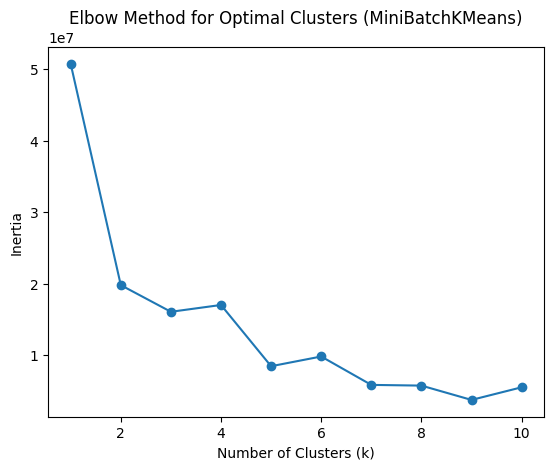

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder

# Step 1: Subset the Data to avoid memory issues (Sample 1000 rows)
sampled_data = shuffled_data.sample(n=1000, random_state=42)  # Adjust the sample size if necessary

# Step 2: One-Hot Encode categorical variables
# Assuming shuffled_data has categorical columns
categorical_columns = sampled_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding for categorical columns
sampled_data_encoded = pd.get_dummies(sampled_data, columns=categorical_columns)

# Step 3: Elbow Method to find the optimal number of clusters using MiniBatchKMeans
k_range = range(1, 11)  # Trying values of k from 1 to 10
inertia = []  # List to store inertia values (sum of squared distances)

# Apply MiniBatchKMeans clustering for each value of k
for k in k_range:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mini_kmeans.fit(sampled_data_encoded)
    inertia.append(mini_kmeans.inertia_)

# Step 4: Plot the Elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (MiniBatchKMeans)')
plt.show()


Silhouette Score for k=2: 0.7454


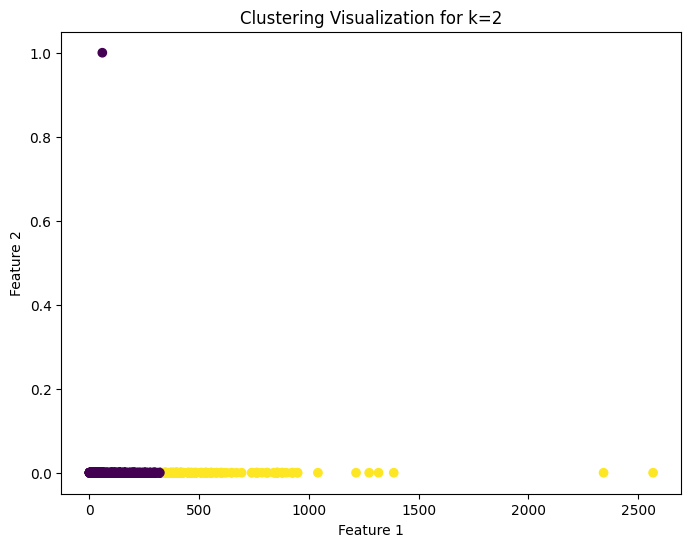

Silhouette Score for k=3: 0.6120


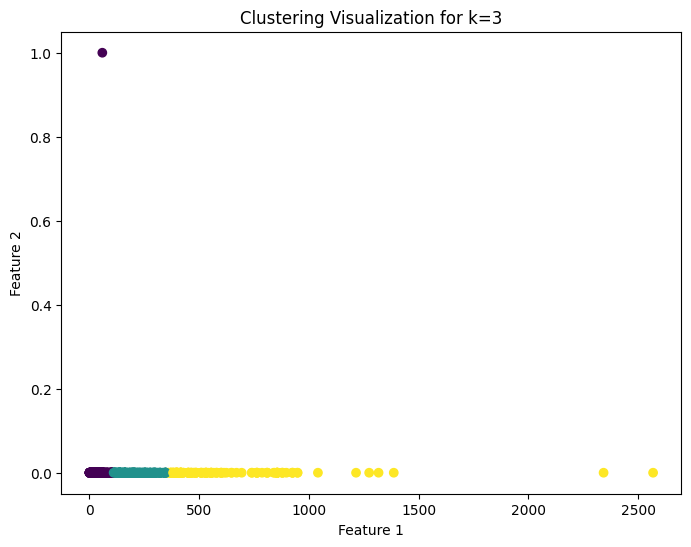

Silhouette Score for k=5: 0.5281


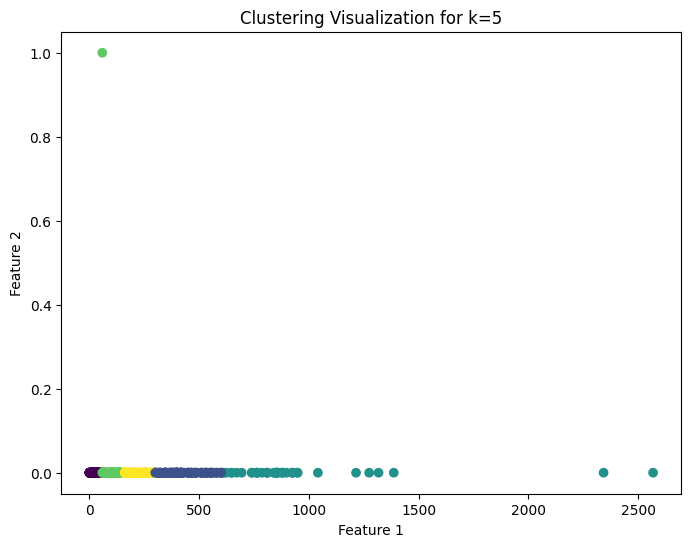

Silhouette Score for k=7: 0.6119


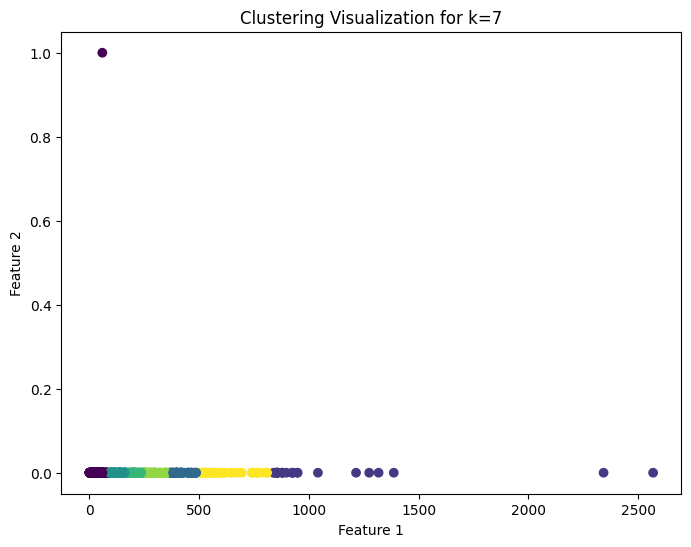

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Subset the Data to avoid memory issues (Sample 1000 rows)
sampled_data = shuffled_data.sample(n=1000, random_state=42)  # Adjust the sample size if necessary

# Step 2: One-Hot Encode categorical variables
categorical_columns = sampled_data.select_dtypes(include=['object']).columns
sampled_data_encoded = pd.get_dummies(sampled_data, columns=categorical_columns)

# Step 3: Define the k values to test
k_values = [2, 3, 5, 7]

# Step 4: Iterate over k values and calculate silhouette score
for k in k_values:
    # Apply MiniBatchKMeans clustering
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    labels = mini_kmeans.fit_predict(sampled_data_encoded)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(sampled_data_encoded, labels)

    # Print the silhouette score
    print(f"Silhouette Score for k={k}: {silhouette_avg:.4f}")

    # Optional: Plot the clusters for visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(sampled_data_encoded.iloc[:, 0], sampled_data_encoded.iloc[:, 1], c=labels, cmap='viridis', label=f'k={k}')
    plt.title(f"Clustering Visualization for k={k}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [23]:
from sklearn.cluster import MiniBatchKMeans

# Apply MiniBatchKMeans with optimal k (k=2)
mini_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=100)
sampled_data['Cluster'] = mini_kmeans.fit_predict(sampled_data_encoded)

# Check the resulting clusters
print(sampled_data[['Cluster']].head())


         Cluster
440412         0
2610553        1
2615668        0
2746507        1
129976         0


          PC1       PC2 Cluster
0   43.840694  0.599043       0
1  286.850478 -1.318058       1
2  -67.269847  0.228744       0
3  233.010482 -1.340310       1
4 -121.339800 -1.125739       0


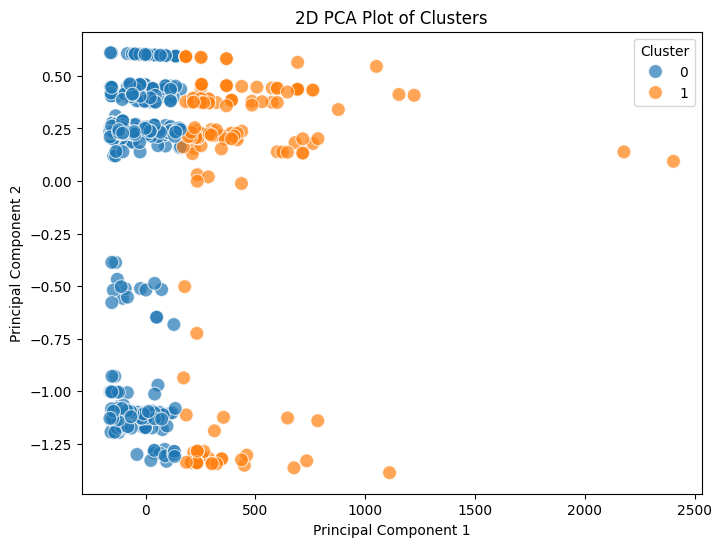

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

# Step 1: Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(sampled_data_encoded)

# Step 2: Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ensure indices match between sampled_data and pca_df
sampled_data = sampled_data.reset_index(drop=True)
pca_df = pca_df.reset_index(drop=True)

# Add the Cluster column
pca_df['Cluster'] = sampled_data['Cluster'].astype(str)

# Step 3: Check the DataFrame
print(pca_df.head())

# Step 4: Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, s=100, alpha=0.7)

# Customize plot
plt.title('2D PCA Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the legend
plt.legend(title='Cluster')
plt.show()


Clustering Based on the price alone

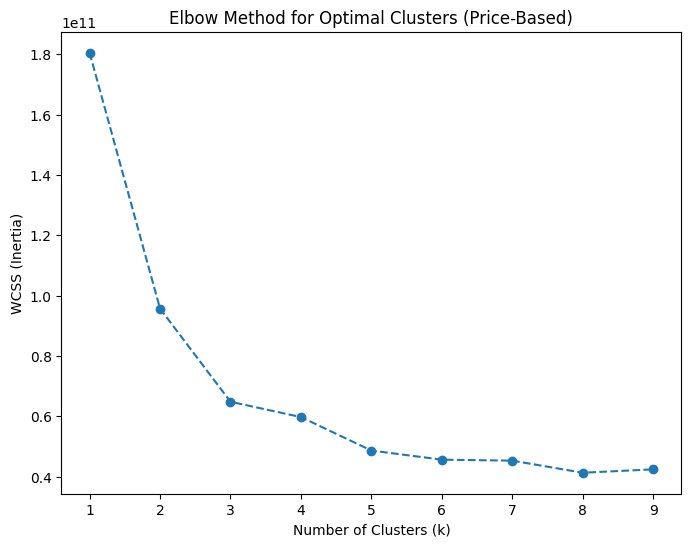

Silhouette Score for k=3: 0.7199


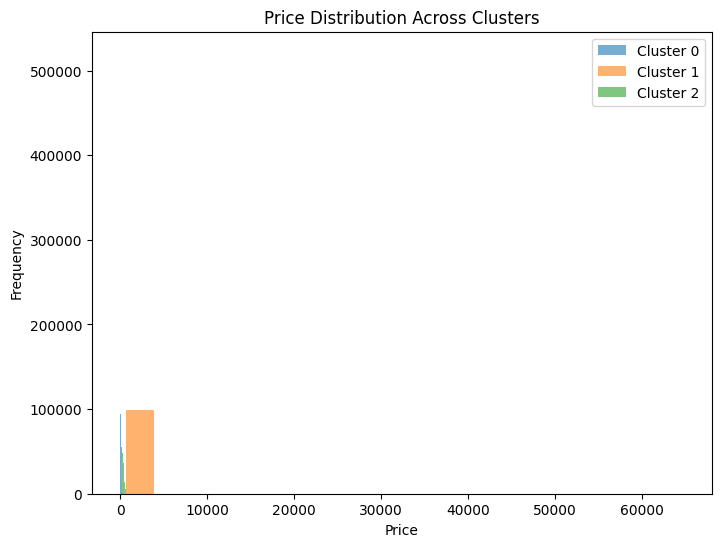

In [33]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Step 1: Extract the 'price' column for clustering
price_data = shuffled_data[['price']].copy()

# Step 2: Elbow Method to Determine Optimal Number of Clusters
k_values = range(1, 10)  # Test k from 1 to 9
wcss = []  # Within-cluster sum of squares

for k in k_values:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mini_kmeans.fit(price_data)
    wcss.append(mini_kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters (Price-Based)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

# Step 3: Choose k (e.g., from the Elbow Plot)
optimal_k = 3  # Adjust based on your Elbow plot

# Step 4: Apply MiniBatchKMeans Clustering
mini_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
shuffled_data['Cluster'] = mini_kmeans.fit_predict(price_data)

# Step 5: Silhouette Score (Using Sampled Data for Speed)
sampled_data = shuffled_data.sample(n=1000, random_state=42)  # Take a sample of 1000 rows for speed
silhouette_avg = silhouette_score(sampled_data[['price']], sampled_data['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.4f}")

# Step 6: Visualization of Price Clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_prices = price_data[shuffled_data['Cluster'] == cluster]
    plt.hist(cluster_prices['price'], bins=20, alpha=0.6, label=f'Cluster {cluster}')

plt.title('Price Distribution Across Clusters')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


From this we can observer that k=3,4 and we can further narrow it by doing Silhouette Analysis

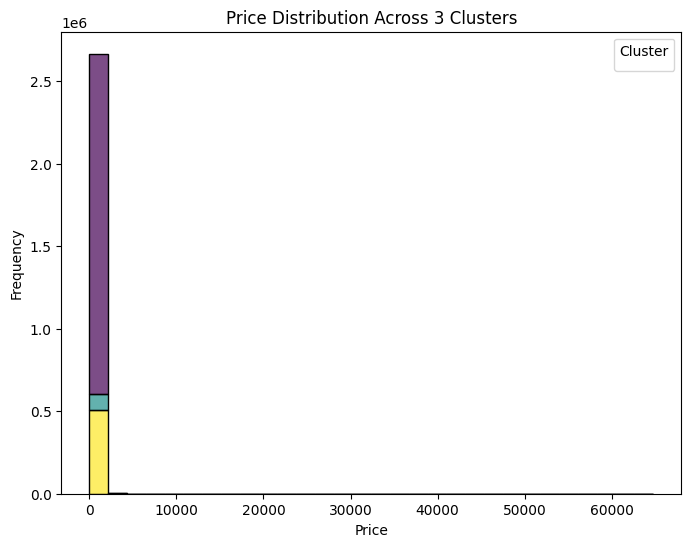

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply MiniBatchKMeans with the chosen number of clusters
optimal_k = 3  # Replace with the k you chose based on the Elbow Method
mini_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
shuffled_data['Cluster'] = mini_kmeans.fit_predict(shuffled_data[['price']])

# Step 2: Plot histogram for price distribution in each cluster
plt.figure(figsize=(8, 6))
sns.histplot(data=shuffled_data, x='price', hue='Cluster', multiple='stack', bins=30, palette='viridis', alpha=0.7)
plt.title(f'Price Distribution Across {optimal_k} Clusters')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()


    price  Cluster
1   11.32        0
4  856.23        1
5  101.83        0
6   11.55        0
7   59.68        0


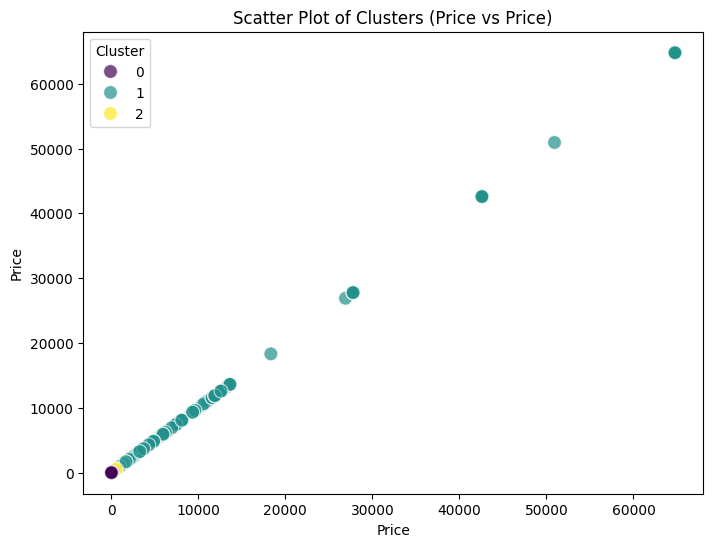

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check if the 'Cluster' column exists in shuffled_data
print(shuffled_data[['price', 'Cluster']].head())  # Ensure 'Cluster' column is populated

# Step 2: Optional Scatter plot (replace 'quantity' with an actual feature from your dataset)
# Verify that 'quantity' or any other column exists, for example, 'rating' or 'amount'
if 'quantity' in shuffled_data.columns:
    y_column = 'quantity'  # Change this to your preferred column, like 'rating', 'amount', etc.
else:
    y_column = 'price'  # If 'quantity' does not exist, you can plot against price again

plt.figure(figsize=(8, 6))
sns.scatterplot(data=shuffled_data, x='price', y=y_column, hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title(f'Scatter Plot of Clusters (Price vs {y_column.capitalize()})')
plt.xlabel('Price')
plt.ylabel(y_column.capitalize())
plt.legend(title='Cluster', loc='best')
plt.show()
